In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv("python excle project.csv")
df = df.rename(columns={
    "State/ut name": "State",
    "Area of flowers production": "Area_Ha",
    "Production of flowers": "Production_MT"
})

# Drop rows with missing production or area values
df = df.dropna(subset=["Area_Ha", "Production_MT"])

# Add Yield column
df["Yield_MT_per_Ha"] = df["Production_MT"] / df["Area_Ha"]


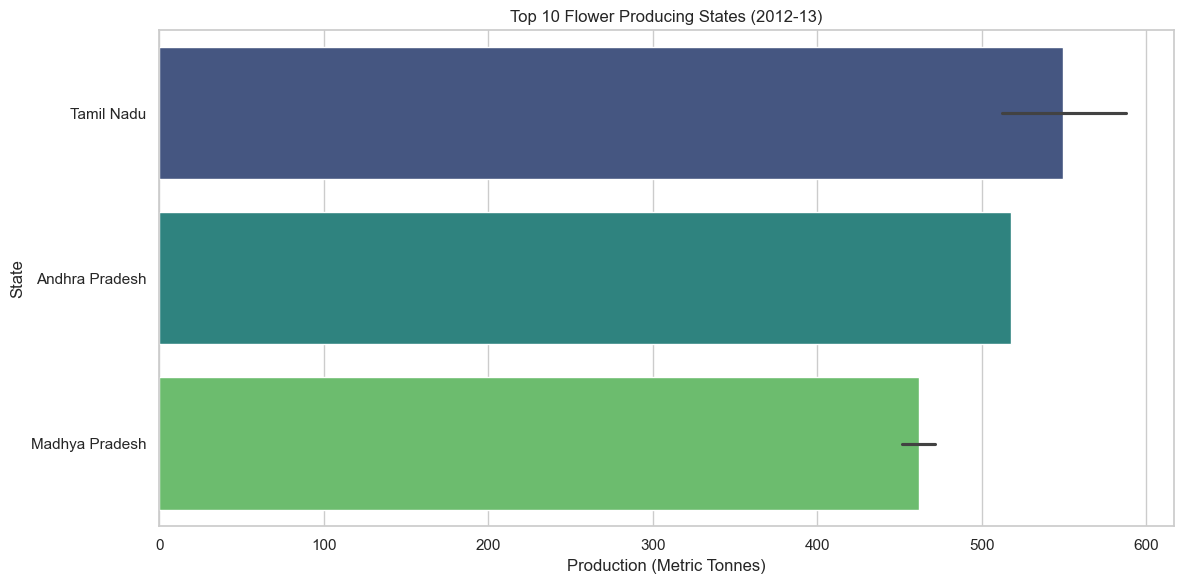

In [58]:
# Objective 1: Top Producing States
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

top_production = df.sort_values(by="Production_MT", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_production,
    x="Production_MT",
    y="State",
    hue="State",         # assign hue
    palette="viridis",   # apply palette per hue
    dodge=False,
    legend=False         # disable redundant legend
)

plt.title("Top 10 Flower Producing States (2012-13)")
plt.xlabel("Production (Metric Tonnes)")
plt.ylabel("State")
plt.tight_layout()
plt.show()


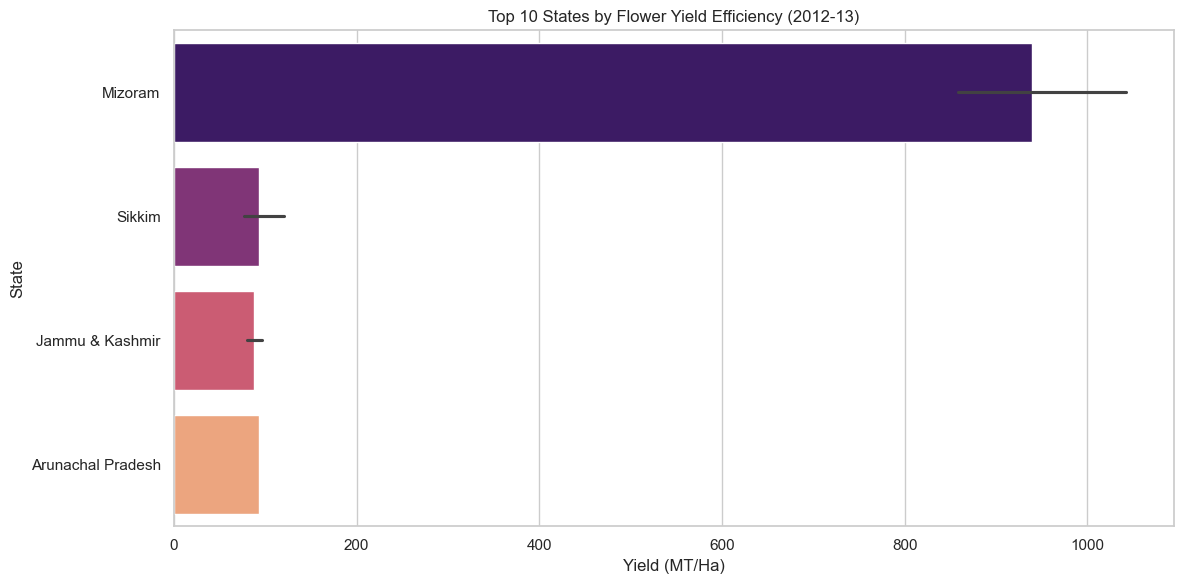

In [59]:
# Objective 2: Yield Efficiency
# -------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

top_yield = df.sort_values(by="Yield_MT_per_Ha", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_yield,
    x="Yield_MT_per_Ha",
    y="State",
    hue="State",         # Assign hue to match bar color to state
    palette="magma",     # Color palette
    dodge=False,
    legend=False         # Hide redundant legend
)

plt.title("Top 10 States by Flower Yield Efficiency (2012-13)")
plt.xlabel("Yield (MT/Ha)")
plt.ylabel("State")
plt.tight_layout()
plt.show()


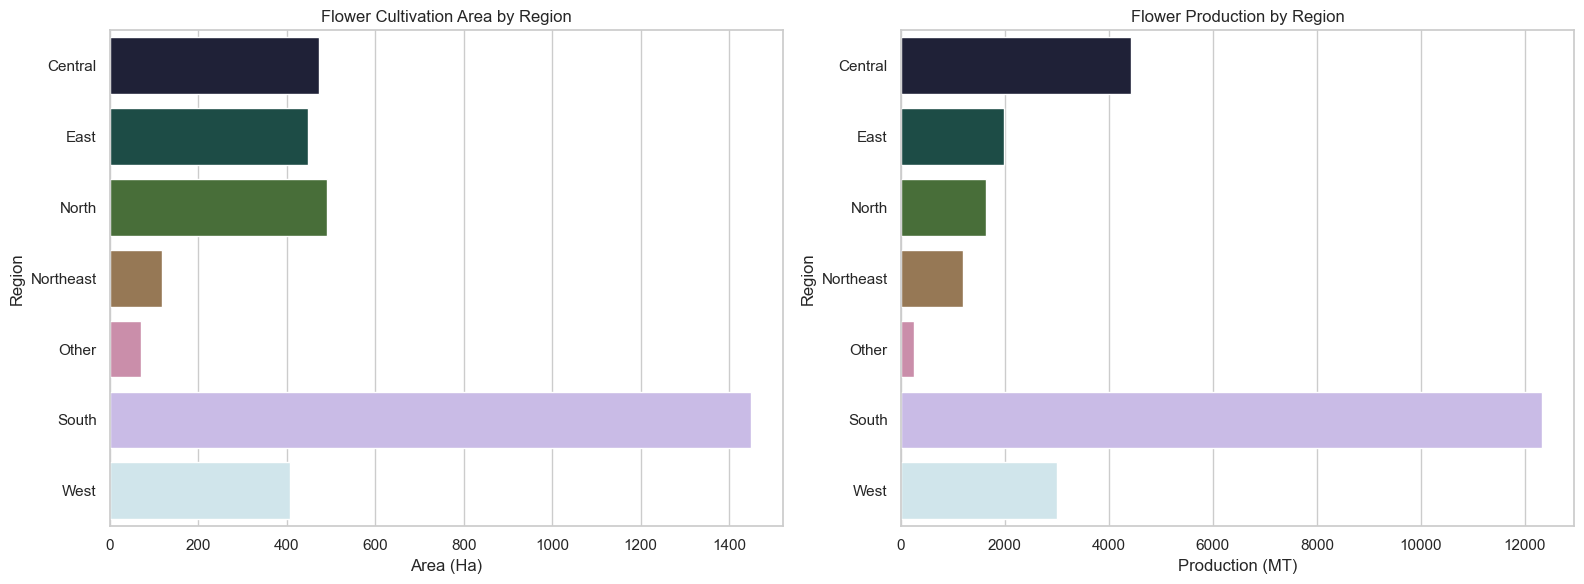

In [60]:
# Objective 3: Regional Comparison
# -------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# First plot: Area by Region
sns.barplot(
    data=region_group,
    x="Area_Ha",
    y="Region",
    hue="Region",
    palette="cubehelix",
    dodge=False,
    legend=False,
    ax=ax[0]
)
ax[0].set_title("Flower Cultivation Area by Region")
ax[0].set_xlabel("Area (Ha)")
ax[0].set_ylabel("Region")

# Second plot: Production by Region
sns.barplot(
    data=region_group,
    x="Production_MT",
    y="Region",
    hue="Region",
    palette="cubehelix",
    dodge=False,
    legend=False,
    ax=ax[1]
)
ax[1].set_title("Flower Production by Region")
ax[1].set_xlabel("Production (MT)")
ax[1].set_ylabel("Region")

plt.tight_layout()
plt.show()


In [34]:
# Calculate medians
area_median = df["Area_Ha"].median()
yield_median = df["Yield_MT_per_Ha"].median()

# Filter: High Area but Low Yield
low_efficiency_states = df[
    (df["Area_Ha"] > area_median) &
    (df["Yield_MT_per_Ha"] < yield_median)
].sort_values(by="Area_Ha", ascending=False)


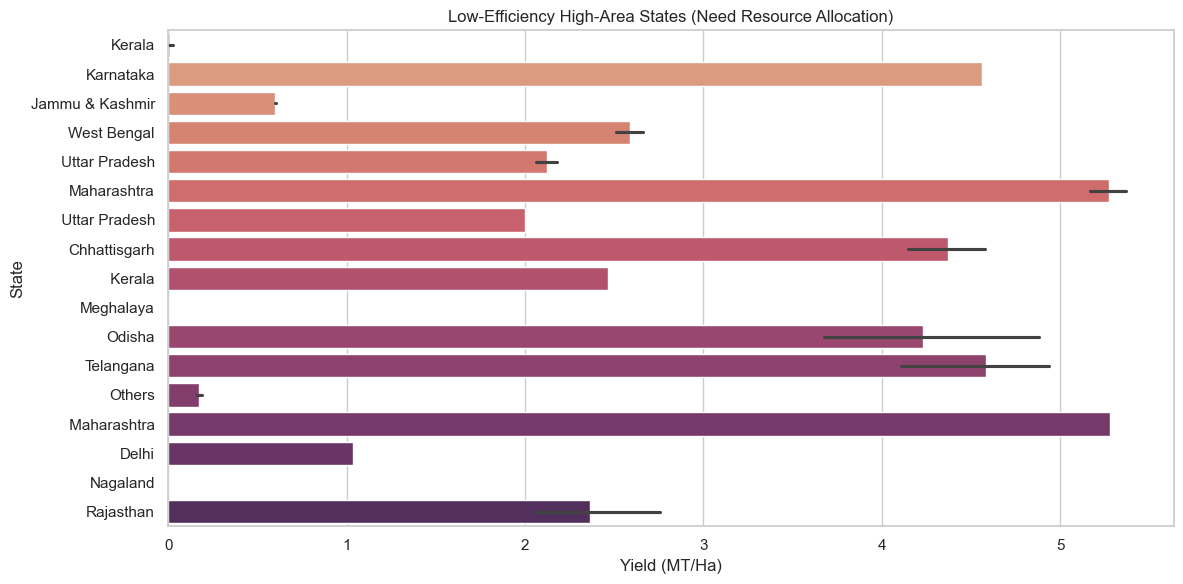

In [61]:
#objectives 4 Resource Allocation Insights
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=low_efficiency_states,
    x="Yield_MT_per_Ha",
    y="State",
    palette="flare",
    hue="State",
    legend=False,
    dodge=False
)

plt.title("Low-Efficiency High-Area States (Need Resource Allocation)")
plt.xlabel("Yield (MT/Ha)")
plt.ylabel("State")
plt.tight_layout()
plt.show()


In [64]:
#objective 5:- Conduct Research on Flower Varieties
print(df.columns)


Index(['ROWID', 'Country', 'SourceYear', 'State', 'Area_Ha', 'Production_MT',
       'Additional info', 'YearCode', 'Year', 'Yield_MT_per_Ha'],
      dtype='object')


In [65]:
import numpy as np

# Add simulated research scores for demo purposes
np.random.seed(42)
df["Climate_Resilience_Score"] = np.random.uniform(1, 10, size=len(df))
df["Pest_Resistance_Score"] = np.random.uniform(1, 10, size=len(df))
df["Flower_Quality_Score"] = np.random.uniform(1, 10, size=len(df))


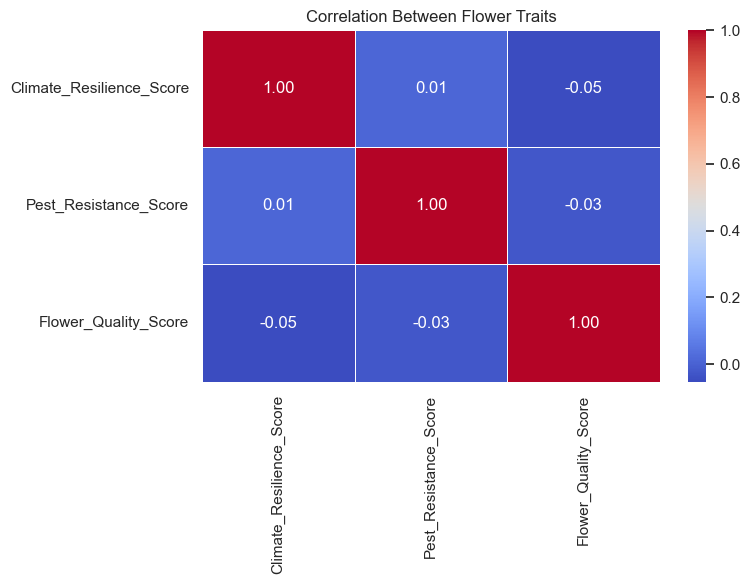

In [66]:
corr_matrix = df[[
    'Climate_Resilience_Score', 
    'Pest_Resistance_Score', 
    'Flower_Quality_Score'
]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Between Flower Traits")
plt.tight_layout()
plt.show()
